In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rc('text', usetex=True)

def fac(k):
    """returns k!"""
    if k < 2: return 1.
    return k * fac(k - 1)

def zernike_poly(Y, X, n, m):
    """calculates Zernike polynomial Z_nm and Z_n-m, saved in phasor
    
    Arguments:
    Y    :    y-coordinates in Euclidean space, np.ndarray
    X    :    x-coordinates in Euclidean space, np.ndarray
    n    :    Radial frequency n, integer int
    m    :    Azimuthal frequency m, m<=n, positive integer int
    
    Returns:
    a+bi :    Z_nm + Z_n-m*i"""
    out = np.zeros(Y.shape, dtype=complex)

    rho = np.sqrt(X**2 + Y**2) # define radial coordinate
    phasor = np.cos(m*np.arctan2(Y,X)) + 1.j * np.sin(m*np.arctan2(Y,X)) # phasor for m and -m azimuthal frequencies

    for k in range((n-m) // 2 + 1): # calculate radial polynomial
        out += (-1.)**k * fac(n-k)/(fac(k) * fac((n - 2*k + m) // 2) * fac((n - 2*k - m) // 2)) * rho**(n - 2*k) * phasor

    return out

In [62]:
N = 1024 # number of pixels in one dimension
n_max = 6 # maximum radial frequency to plot
shape = (N, N)
radius = N // 2
center = (N // 2, N // 2)

Y, X = np.mgrid[:shape[0], :shape[1]] # get coordinates
Yc = (Y - center[0]) / radius # normalize coordinates
Xc = (X - center[1]) / radius
in_circle = (Xc**2 + Yc**2)**.5 <= 1. # set unit disk

out = {}
for n in range(n_max):
    for m in range(n + 1):
        if (n-m) % 2 == 0: # check if n-m even is satisfied
            reconstruction = zernike_poly(Yc, Xc, n, m)
            reconstruction[~in_circle] = np.nan + 1.j * np.nan # np.nan is "Not a Number", useful because plt.imshow
                                                                # will not plot anything there
            out[(n, m)] = reconstruction.real
            if m != 0:
                out[(n, -m)] = reconstruction.imag
        else: # if n-m is odd, continue = do nothing and go to the next n,m pair in loop
            continue

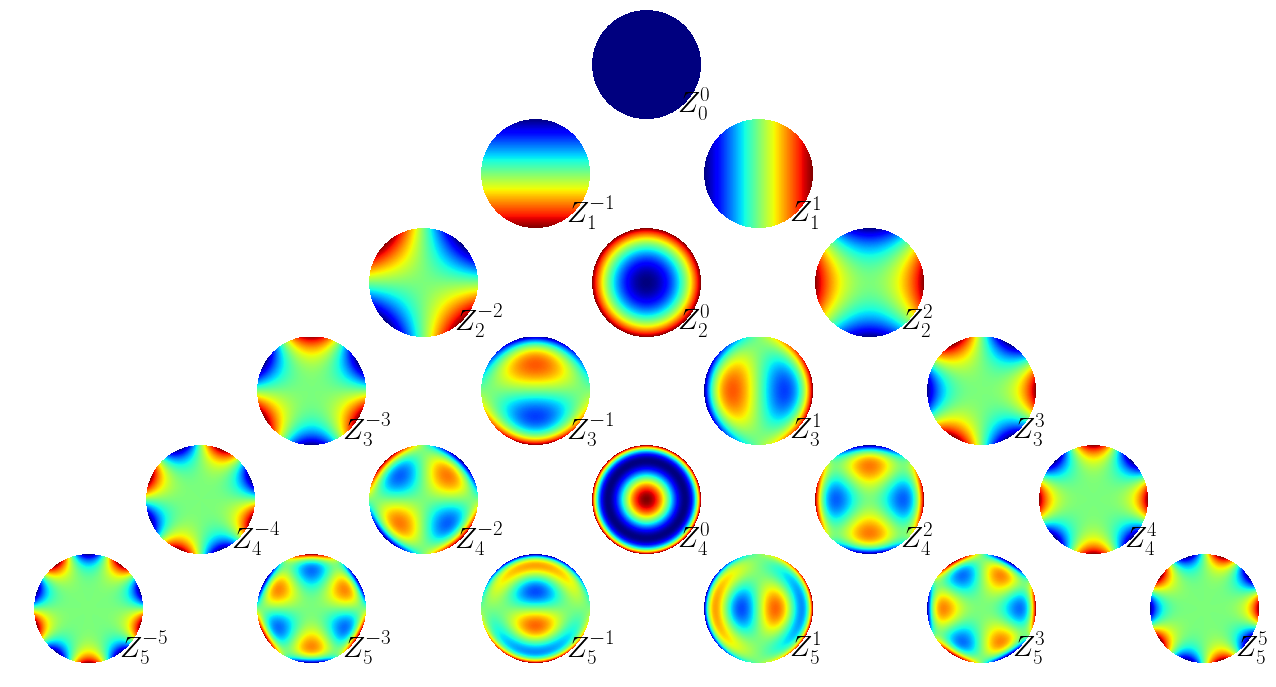

In [63]:
f, ax = plt.subplots(n_max, n_max * 2 - 1, figsize=(2*(n_max * 2 - 1), 2*n_max))

for axis in ax.ravel():
    axis.set_axis_off() # make all axes labels and lines disappear
    
for key, image in out.items():
    axis = ax[key[0], key[1] + n_max - 1] # select the relevant coordinate associated with zernike
    axis.imshow(image, cmap='jet') # plot zernike. Jet = rainbow color
    
    # place text. We will go over the string formatting
    axis.text(.8,0, r'$Z_{%s}^{%s}$' % (str(key[0]),str(key[1])), transform=axis.transAxes, color='k', size=30)

plt.subplots_adjust(wspace=0, hspace=0) #remove spacing between plots